# AM 205 - Assignment 2
## By Jonathan Guillotte-Blouin

In [13]:
import numpy as np
import numpy.linalg as la
import scipy.stats
import matplotlib
import matplotlib.pyplot as plt
import sys

$\newcommand{\N}{\mathbb{N}}
\newcommand{\Z}{\mathbb{Z}}
\newcommand{\Q}{\mathbb{Q}}
\newcommand{\R}{\mathbb{R}}
\newcommand{\B}{\mathbb{B}}
\renewcommand{\P}{\mathbb{P}}
\newcommand{\p}{\partial}
\newcommand{\Trans}{\mathsf{T}}
\renewcommand{\vec}[1]{\mathbf{#1}}
\newcommand{\vx}{\vec{x}}
\newcommand{\vb}{\vec{b}}$

### Question 1: Norms and Newton root-finding

a) Find four points $b \in \R^2$ such that $||b||_2 = 1$ and $||Ab||_2=1$. Plot the two curves $||x||_2=1$ and $||Ax||_2=1$ and mark the points $b$ on this plot.

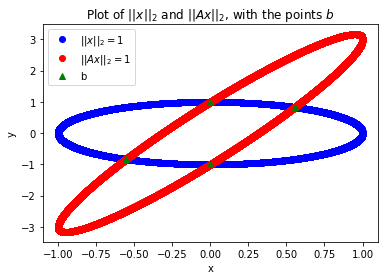

In [135]:
domain_1a = np.linspace(0,2*np.pi, 10000)

# generate the points using ellipse functions
domain_x1a = [np.cos(t) for t in domain_1a]
values_x1a = [np.sin(t) for t in domain_1a]
domain_Ax1a = [np.sin(t) for t in domain_1a]
values_Ax1a = [-np.cos(t) + 3 * np.sin(t) for t in domain_1a]
domain_intersect1a = [2/np.sqrt(13), -2/np.sqrt(13), 0, 0]
values_intersect1a = [3/np.sqrt(13), -3/np.sqrt(13), 1, -1]

plt.title(r'Plot of $||x||_2$ and $||Ax||_2$, with the points $b$')
plt.plot(domain_x1a, values_x1a, 'bo', label=r'$||x||_2 = 1$', linestyle='None')
plt.plot(domain_Ax1a, values_Ax1a, 'ro', label=r'$||Ax||_2 = 1$', linestyle='None')
plt.plot(domain_intersect1a, values_intersect1a, 'g^', label='b', linestyle='None');
plt.xlabel("x")
plt.ylabel("y")
plt.legend()

##### How did I find the four points $b$?

We have
$A = \left[\begin{array}{cc}
	3 & -1 \\
	1 & 0
      \end{array}\right]$
and
$b = \left[\begin{array}{c}
	x \\
	y
      \end{array}\right]$. By the constraints of the problem, we can infer these two equations:
      
1. $x^2 + y^2 = 1$ (because $||b||_2 = 1$)
2. $10x^2 - 6xy + y^2 = 1$ (because $||Ab||_2 = 1$)

$$x^2 + y^2 = 10x^2 - 6xy + y^2$$
$$9x^2 - 6xy = 0$$
$$3x(3x - 2y) = 0$$

We have two possibilities to satisfy the system

Case 1. $3x = 0$ (therefore $x = 0$)

Case 2. $3x - 2y = 0$ (therefore $x = \frac{2}{3}y$)

Given equation 1, we know that $y = \sqrt{1 - x^2}$. If $x=0$ (case 1), then we have two points: $(0,1)$ and $(0,-1)$. For the second case,

$$x^2 + y^2 = (\frac{2}{3}y)^2 + y^2 = \frac{4}{9}y^2 + y^2 = \frac{13}{9}y^2 = 1$$
$$y = \sqrt{\frac{9}{13}} = \frac{3}{\sqrt{13}}$$

If $y = \frac{3}{\sqrt{13}}$, then we know that $x = \frac{2}{3}y = \frac{2}{\sqrt{13}}$. We therefore have two new points: $(\frac{2}{\sqrt{13}}, \frac{3}{\sqrt{13}})$ and $(-\frac{2}{\sqrt{13}}, -\frac{3}{\sqrt{13}})$.

To restate: our four points are $(0,1)$, $(0,-1)$, $(\frac{2}{\sqrt{13}}, \frac{3}{\sqrt{13}})$, and $(-\frac{2}{\sqrt{13}}, -\frac{3}{\sqrt{13}})$.

In [87]:
np.linalg.norm(np.matrix([[-2],[1]]), np.inf)

2.0

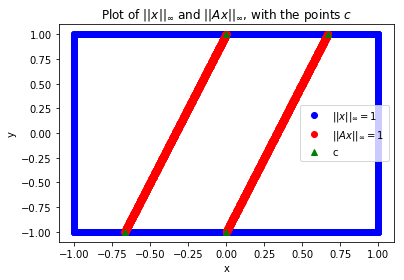

In [137]:
domain_1b = np.linspace(-1,1, 1000)

domain_x1b = []
values_x1b = []
domain_Ax1b = []
values_Ax1b = []
for x in domain_1b:
    if abs(x) != 1:
        domain_x1b += [x, x]
        values_x1b += [1, -1]
    else:
        domain_x1b += [x] * 1000
        values_x1b += [x for x in domain_1b]
        
    for y in domain_1b:
        if abs(max(abs(3*x - y), abs(x)) - 1) < 0.01: # I use an epsilon 0.01 here as an approximation measure
            domain_Ax1b.append(x)
            values_Ax1b.append(y)
domain_intersect1b = [2/3, -2/3, 0, 0]
values_intersect1b = [1, -1, 1, -1]     
        
plt.title(r'Plot of $||x||_\infty$ and $||Ax||_\infty$, with the points $c$')
plt.plot(domain_x1b, values_x1b, 'bo', label=r'$||x||_\infty = 1$', linestyle='None')
plt.plot(domain_Ax1b, values_Ax1b, 'ro', label=r'$||Ax||_\infty = 1$', linestyle='None')
plt.plot(domain_intersect1b, values_intersect1b, 'g^', label='c', linestyle='None');
plt.xlabel("x")
plt.ylabel("y")
plt.legend()

##### How did I find the four points $c$?

We have
$A = \left[\begin{array}{cc}
	3 & -1 \\
	1 & 0
      \end{array}\right]$
and
$c = \left[\begin{array}{c}
	x \\
	y
      \end{array}\right]$. By the constraints of the problem, we can infer these two equations (with corresponding conditions):
      
1. $||c||_\infty = \texttt{max}(|x|, |y|) = 1 \implies -1 \leq x \leq 1, -1 \leq y \leq 1, (x = \pm1 \, \texttt{OR} \, y = \pm1)$
2. $||Ac||_\infty = \texttt{max}(|3x-y|, |x|) = 1 \implies -1 \leq 3x - y \leq 1, -1 \leq x \leq 1, (x = \pm1 \, \texttt{OR} \, 3x - y = \pm1)$

If $x = 1$, then (second equation) $|3x-y| = |3-y| \leq 1$, but that is impossible considering that $|y| \leq 1$ (equation 1). So, $|3x-y|$ must be equal to 1.


If $y = 1$, then $|3x - 1| = 1 \implies x = \frac{2}{3}, x = 0$. These two points satisfy all of our conditions, so $(\frac{2}{3}, 1)$ and $(0, 1)$ are our first two points.

If $y = -1$, then $|3x + 1| = 1 \implies x = -\frac{2}{3}, x = 0$. These two points satisfy all of our conditions, so $(-\frac{2}{3}, -1)$ and $(0, -1)$ are our last two points.

To restate: our four points are $(\frac{2}{3}, 1)$, $(0, 1)$, $(-\frac{2}{3}, -1)$, and $(0, -1)$.

### Question 2: LU factorization for binary numbers

a) Write a function `fsolve`.



In [160]:
def is_not_binary_matrix(A):
    return np.any(A < 0) or np.any(A > 1)

def fsolve(L, b, no_singular=True):
    # check L and B are binary
    if is_not_binary_matrix(L) or is_not_binary_matrix(b):
        print("We work with binary digits, L or b is not right!")
        sys.exit()
    
    # check L
    for i in range(len(L)):
        row = L[i]
        
        if no_singular and row[i] == 0:
            print("Diagonal element == 0; singular matrices are not accepted!")
            sys.exit()
        
        if np.any(row[i+1:] != 0):
            print("This is not a valid lower triangular matrix!")
            sys.exit()
    
    # check b
    if b.shape != (len(L), 1):
        print("b should be a vector of length {}".format(len(L)))
        sys.exit()

    # solve Lx = b
    x = np.zeros((len(b),1),dtype=np.int8)
    for i in range(len(L)):
        li_left = L[i][:i] # coefficients in L on the current row, but to the left of the diagonal
        summedTerms = 0
        for j in range(len(li_left)):
            summedTerms ^= li_left[j] & x[j][0] # += lij * xj0
            
        bi = b[i][0]
        xi = bi ^ summedTerms # no need to divide by lii, as it has to be "1s" on the diagonal
        x[i] = np.array([xi],dtype=np.int8)

    return x

l=np.array([[1,0,0,0],[0,1,0,0],[1,1,1,0],[1,0,1,1]],dtype=np.int8)
b=np.array([[1,],[1],[0],[0]],dtype=np.int8)

fsolve(l,b)

array([[1],
       [1],
       [0],
       [1]], dtype=int8)

b) Write a function `rsolve`.

In [151]:
def rsolve(L, b, no_singular=True):
    # check L and B are binary
    if is_not_binary_matrix(L) or is_not_binary_matrix(b):
        print("We work with binary digits, L or b is not right!")
        sys.exit()
    
    # check L
    for i in range(len(L)):
        row = L[i]
        
        if no_singular and row[i] == 0:
            print("Diagonal element == 0; singular matrices are not accepted!")
            sys.exit()
        
        if np.any(row[:i] != 0):
            print("This is not a valid upper triangular matrix!")
            sys.exit()
    
    # check b
    if b.shape != (len(L), 1):
        print("b should be a vector of length {}".format(len(L)))
        sys.exit()

    # solve Lx = b
    x = np.zeros((len(b),1),dtype=np.int8)
    for i in reversed(range(len(L))):
        li_right = L[i][i+1:] # coefficients in L on the current row, but to the right of the diagonal
        summedTerms = 0
        for j in range(len(li_right)):
            summedTerms ^= li_right[j] & x[i+j+1][0] # we need to do x[i+j+1] to get the right index in `x`, because `li_right` is dephased
            
        bi = b[i][0]
        xi = bi ^ summedTerms # no need to divide by lii, as it has to be "1s" on the diagonal
        x[i] = np.array([xi],dtype=np.int8)

    return x

u=np.array([[1,1,1,1],[0,1,1,1],[0,0,1,1],[0,0,0,1]],dtype=np.int8)

rsolve(u,b)

array([[0],
       [1],
       [0],
       [0]], dtype=int8)

c) Write a program to calculate the LU factorization with partial pivoting.

In [152]:
def findPivot(col):
    for i in range(len(col)):
        if col[i] == 1:
            return i
    else:
        return 0

def swap(A, i, j):
    tmp = np.copy(A[i])
    A[i] = A[j]
    A[j] = tmp
    
def get_PLU(A):
    # pivot (should give us P, L, U)
    P = np.identity(len(A),dtype=np.int8)
    L = np.zeros((len(A),len(A)),dtype=np.int8)
    U = np.copy(A)
    
    for i in range(len(A) - 1): # -1 because there's nothing to do on the last row
        pivotIndex = i + findPivot(A[i:,i]) # add i to keep track of the right row

        # do we swap rows?
        if pivotIndex != i:
            swap(P, i, pivotIndex)
            swap(U, i, pivotIndex)
            swap(L, i, pivotIndex)
        
        # reduce
        pivot, pivotRow = U[i][i], U[i][i:]
        underneath = U[i+1:,i:] # sub-matrix underneath the pivotRow, ignoring what's to the left too
        for j in range(len(underneath)):
            underneath_row = underneath[j]
            multiplier = 0

            for k in range(len(underneath_row)):
                currCell = underneath_row[k]
                
                # calculate row's multiplier if in column under the pivot
                if k == 0:
                    multiplier = 0 if currCell == 0 else 1
                    
                    # update L and the current cell, if multiplier is not 0
                    if multiplier == 1:
                        L[i+j+1][i] = 1
                        U[i+1+j][i] = 0                
                elif multiplier == 1:
                    U[i+j+1][i+k] ^= pivotRow[k] # do the difference
    
    # add the '1s' on the diagonal of L
    for i in range(len(L)):
        L[i][i] = 1
    
    return (P, L, U)

A1 = np.array([[0,0,1],[1,0,0],[1,1,1]],dtype=np.int8)
get_PLU(A1)

(array([[0, 1, 0],
        [0, 0, 1],
        [1, 0, 0]], dtype=int8), array([[1, 0, 0],
        [1, 1, 0],
        [0, 0, 1]], dtype=int8), array([[1, 0, 0],
        [0, 1, 1],
        [0, 0, 1]], dtype=int8))

d) Find the solutions $x$ to both linear systems (small and large)

In [161]:
# taken from the files
def bin_mul(c,d):
    # Check that the dimensions of the matrices are compatible
    (m,n)=c.shape
    (nn,p)=d.shape
    if n!=nn:
        print("Matrix size mismatch")
        sys.exit()

    # Initalize blank matrix of integer zeros
    e=np.zeros((m,p),dtype=np.int8)

    # Calculate each term, using "&" instead of "*" and "^" instead of "+"
    for i in range(m):
        for j in range(p):
            for k in range(n):
                e[i,j]=e[i,j]^(c[i,k]&d[k,j])
    return e

def LU(A, b, no_singular=True):
    P, L, U = get_PLU(A)
    
    pb = bin_mul(P, b)
    y = fsolve(L, pb, no_singular)
    return (P, L, U, rsolve(U, y, no_singular))

b1 = np.array([[1],[1],[0]],dtype=np.int8)
LU(A1, b1)

(array([[0, 1, 0],
        [0, 0, 1],
        [1, 0, 0]], dtype=int8), array([[1, 0, 0],
        [1, 1, 0],
        [0, 0, 1]], dtype=int8), array([[1, 0, 0],
        [0, 1, 1],
        [0, 0, 1]], dtype=int8), array([[1],
        [0],
        [1]], dtype=int8))

In [162]:
def read_file_into_matrix(path_to_file):
    with open(path_to_file) as f:
        content = f.readlines()
        return np.array([x.strip().split(" ") for x in content],dtype=np.int8)
        
A_small, b_small = read_file_into_matrix("a_small.txt"), read_file_into_matrix("b_small.txt")

print("Ax = b (for small)")
P_small, L_small, U_small, x_small = LU(A_small, b_small, no_singular=False)
print(x_small)
print("\n")

A_big, b_big = read_file_into_matrix("a_big.txt"), read_file_into_matrix("b_big.txt")

print("Ax = b (for big)")
P_big, L_big, U_big, x_big = LU(A_big, b_big, no_singular=False)
print(x_big)

Ax = b (for small)
[[0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]]


Ax = b (for big)
[[1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]]


### Question 3: The light game

a) Find four points $b \in \R^2$ such that $||b||_2 = 1$ and $||Ab||_2=1$. Plot the two curves $||x||_2=1$ and $||Ax||_2=1$ and mark the points $b$ on this plot.